In [1]:
# Import required Dependencies
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import datetime

# Pre Processing
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from functools import partial

# Error Metrics
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_curve, auc
from sklearn.inspection import DecisionBoundaryDisplay

# Classifiers
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# DL models
from tensorflow.keras import layers 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.python.keras.layers import deserialize, serialize
from tensorflow.python.keras.saving import saving_utils

# Save models
import pickle

#Cross Validation 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

#Parallel backend processing
from concurrent.futures import ProcessPoolExecutor
from joblib import parallel_backend

In [2]:
import os

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "CC_2023"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches='tight')

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 2023 data

In [3]:
# Load the saved sample of data in CSV format for 2021 as train data
df = pd.read_csv('CC_20230910.csv')

In [4]:
df.head()

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
0,884.0,0.332088,0.299619,0.633595,0.408799,1290.0,0.041239,0.085766,0.535219,0.186753,...,1.509823,2.382946,0.553310,0.434185,32440.0,-0.305487,0.015961,4.992914,0.079693,2.0
1,900.0,0.313104,0.316513,0.655674,0.402827,1352.0,0.045201,0.110632,0.525780,0.200710,...,1.540252,2.349112,0.558391,0.436469,38440.0,-0.282418,0.013790,6.609541,0.091145,2.0
2,921.0,0.308188,0.321067,0.654215,0.404793,1366.0,0.045702,0.104439,0.522043,0.194578,...,1.544061,2.360176,0.555609,0.441092,39280.0,-0.285038,0.014154,7.793242,0.110306,2.0
3,924.0,0.314756,0.288697,0.646140,0.397342,1406.0,0.039744,0.105815,0.514167,0.206867,...,1.498162,2.318634,0.558317,0.424632,34240.0,-0.289691,0.011056,9.924413,0.109723,2.0
4,934.0,0.307736,0.292751,0.638164,0.405949,1418.0,0.041307,0.095461,0.511034,0.205782,...,1.510351,2.366714,0.564569,0.420342,35880.0,-0.297118,0.009376,8.233112,0.077192,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70836 entries, 0 to 70835
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   blue    70836 non-null  float64
 1   dbsi    70836 non-null  float64
 2   evi     70836 non-null  float64
 3   gi      70836 non-null  float64
 4   gndvi   70836 non-null  float64
 5   green   70836 non-null  float64
 6   kndvi   70836 non-null  float64
 7   ndci    70836 non-null  float64
 8   ndpi    70836 non-null  float64
 9   ndvigb  70836 non-null  float64
 10  ndvi    70836 non-null  float64
 11  nir     70836 non-null  float64
 12  npci    70836 non-null  float64
 13  psri    70836 non-null  float64
 14  red     70836 non-null  float64
 15  rvi1    70836 non-null  float64
 16  rvi2    70836 non-null  float64
 17  sipi    70836 non-null  float64
 18  srpi    70836 non-null  float64
 19  tvi     70836 non-null  float64
 20  vari    70836 non-null  float64
 21  VH      70836 non-null  float64
 22

In [6]:
df.describe()

,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
count,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,...,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000,70836.000000
mean,376.800144,-0.079805,1.085273,1.084761,0.588863,775.785843,0.341430,0.313526,0.485703,0.429762,...,5.656533,4.601375,0.776235,0.401815,127811.243718,0.003181,0.018969,8.146039,0.094902,1.618781
std,306.398753,0.226814,0.541669,0.375716,0.149461,348.908909,0.215045,0.174083,0.083991,0.192829,...,4.548222,2.220480,0.161120,0.108363,69765.553902,0.197747,0.011440,82.474607,0.113980,0.485690
min,1.000000,-0.523478,0.051656,0.410138,0.067774,89.000000,0.001156,-0.182738,0.022573,0.033264,...,1.070393,1.145403,0.166746,0.003401,-10320.000000,-0.463687,0.000014,0.176180,0.002988,1.000000
25%,162.000000,-0.279186,0.562421,0.765349,0.452439,545.000000,0.110111,0.152403,0.429531,0.244340,...,1.996276,2.652562,0.623230,0.344523,66255.000000,-0.181062,0.010855,2.790756,0.051536,1.000000
50%,260.000000,-0.123635,1.162943,1.003804,0.624213,672.000000,0.379781,0.327955,0.479701,0.431676,...,4.439227,4.322160,0.833697,0.419053,132000.000000,0.002395,0.016692,4.578459,0.075628,2.000000
75%,522.000000,0.123457,1.544538,1.321101,0.709402,914.000000,0.535368,0.455546,0.537425,0.562232,...,7.813347,5.882353,0.908715,0.472434,188080.000000,0.164676,0.024456,7.799378,0.110582,2.000000
max,2152.000000,0.652618,3.448349,4.183908,0.931488,2834.000000,0.738412,0.826261,0.896451,0.995546,...,73.428571,28.191781,0.999501,1.620690,372760.000000,0.893548,0.147113,16510.246094,5.831423,2.000000


In [7]:
df['class'].value_counts()

2.0    43832
1.0    27004
Name: class, dtype: int64

In [8]:
np.isinf(df).values.sum()

0

In [9]:
df.isnull().sum()

blue      0
dbsi      0
evi       0
gi        0
gndvi     0
green     0
kndvi     0
ndci      0
ndpi      0
ndvigb    0
ndvi      0
nir       0
npci      0
psri      0
red       0
rvi1      0
rvi2      0
sipi      0
srpi      0
tvi       0
vari      0
VH        0
VV-VH     0
VV        0
class     0
dtype: int64

# Data Preparation for Model Building

In [10]:
import warnings
warnings.filterwarnings("ignore")

## Generating noise to the original data to represent 'Others' class

In [11]:
# Extract features and labels from half of the original data as we want to generate only half
df_half = df.sample(frac=0.5)
X_org = df_half.iloc[:, :-1]
y_org = df_half.iloc[:, -1]

# Set the number of synthetic samples you want to generate (Half of the data to be equal class 1 or 2)
num_synthetic_samples = X_org.shape[0]
print(num_synthetic_samples)

# Specify the mean and standard deviation for the noise
mu, sigma = 0, 0.1

# Generate synthetic noise with the same dimension as the original features
synthetic_noise = np.random.normal(mu, sigma, size=(num_synthetic_samples, 24))

# Create synthetic samples by adding noise to the original features
synthetic_samples = X_org + synthetic_noise
print(synthetic_samples.shape)

# Label the synthetic samples as "Others" (or any label you prefer)
synthetic_labels = pd.Series([3] * num_synthetic_samples, name=y_org.name)
#synthetic_labels = pd.Series(np.tile([3], num_synthetic_samples), name=y_org.name)
print(synthetic_labels.shape)

# Combine the original and synthetic data
new_df = pd.concat([synthetic_samples.reset_index(drop=True), synthetic_labels.reset_index(drop=True)], axis=1)
print(new_df.shape)
dff = pd.concat([df.reset_index(drop=True), new_df.reset_index(drop=True)])
print(dff.shape)

dff

35418
(35418, 24)
(35418,)
(35418, 25)
(106254, 25)


,blue,dbsi,evi,gi,gndvi,green,kndvi,ndci,ndpi,ndvigb,...,rvi1,rvi2,sipi,srpi,tvi,vari,VH,VV-VH,VV,class
0,884.000000,0.332088,0.299619,0.633595,0.408799,1290.000000,0.041239,0.085766,0.535219,0.186753,...,1.509823,2.382946,0.553310,0.434185,32440.000000,-0.305487,0.015961,4.992914,0.079693,2.0
1,900.000000,0.313104,0.316513,0.655674,0.402827,1352.000000,0.045201,0.110632,0.525780,0.200710,...,1.540252,2.349112,0.558391,0.436469,38440.000000,-0.282418,0.013790,6.609541,0.091145,2.0
2,921.000000,0.308188,0.321067,0.654215,0.404793,1366.000000,0.045702,0.104439,0.522043,0.194578,...,1.544061,2.360176,0.555609,0.441092,39280.000000,-0.285038,0.014154,7.793242,0.110306,2.0
3,924.000000,0.314756,0.288697,0.646140,0.397342,1406.000000,0.039744,0.105815,0.514167,0.206867,...,1.498162,2.318634,0.558317,0.424632,34240.000000,-0.289691,0.011056,9.924413,0.109723,2.0
4,934.000000,0.307736,0.292751,0.638164,0.405949,1418.000000,0.041307,0.095461,0.511034,0.205782,...,1.510351,2.366714,0.564569,0.420342,35880.000000,-0.297118,0.009376,8.233112,0.077192,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35413,184.026217,-0.163574,1.042842,1.085006,0.650180,556.078176,0.410429,0.267383,0.555611,0.385411,...,5.277781,5.119876,0.773961,0.451838,137959.751130,-0.078690,0.085784,3.464153,-0.099280,3.0
35414,79.915304,-0.361447,2.010803,1.549897,0.901849,327.940401,0.638346,0.390524,0.543102,0.578175,...,15.332574,9.343946,1.010746,0.161246,175140.007461,0.478198,0.042526,48.728449,0.235682,3.0
35415,988.080046,0.222244,0.279456,0.767634,0.344615,1441.875685,0.026972,-0.072313,0.453782,0.169502,...,1.339497,2.327187,0.609984,0.422423,30160.092860,-0.201014,0.126291,8.782101,-0.068413,3.0
35416,190.004821,-0.273516,1.742081,1.233282,0.896308,458.009627,0.685576,0.379704,0.628885,0.373050,...,9.235170,7.379354,0.800077,0.587828,183500.115252,0.257201,-0.089801,3.792699,-0.074791,3.0


In [12]:
# Creating training set from the 2023 data
X_test_noi = dff.iloc[:, :-1]
y_test_noi = dff.iloc[:, -1]

# Apply MinMax scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_test_noi), columns=X_test_noi.columns)

# Apply horizontal flipping
X_flipped_horizontal = pd.DataFrame(np.fliplr(X_scaled.values), columns=X_test_noi.columns)

# Multiply the labels (y) by 2
y_aug = pd.concat([y_test_noi] * 2, axis=0, ignore_index=True)

# Concatenate the augmented features
X_aug = pd.concat([X_scaled, X_flipped_horizontal], axis=0, ignore_index=True)

# Concatenate the augmented features and labels
df_aug_flp = pd.concat([X_aug, y_aug], axis=1, ignore_index=False)

# Splitting the data into train and test
X_aug_flp = df_aug_flp.iloc[:, :-1]
y_aug_flp = df_aug_flp.iloc[:, -1]

## Test set: 2023

In [13]:
# Creating training set from the 2023 data
X_test_2023 = df.iloc[:, :-1]
y_test_2023 = df.iloc[:, -1]

# Load the scaler object
with open('models/CC/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Transform the 2023 data using the loaded scaler
X_test_2023_scaled = scaler.transform(X_test_2023)

print(X_test_2023_scaled.shape)
print("Unique values in y_test_2023:", y_test_2023.unique())

(70836, 24)
Unique values in y_test_2023: [2. 1.]


In [14]:
df_X = pd.DataFrame(X_test_2023_scaled)
df_X

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,0.097205,0.778340,0.939056,0.001421,0.427990,0.149762,0.267012,0.307728,0.733548,0.525194,...,0.246533,0.000186,0.000440,0.513501,0.001850,0.495025,0.000088,0.480762,0.001557,0.019927
1,0.098965,0.767994,0.939057,0.001468,0.424210,0.156965,0.269311,0.322887,0.728914,0.531399,...,0.249682,0.000192,0.000431,0.516656,0.001857,0.586583,0.000124,0.478656,0.002057,0.020392
2,0.101276,0.765315,0.939057,0.001465,0.425454,0.158592,0.269603,0.319112,0.727079,0.528673,...,0.252832,0.000192,0.000434,0.514929,0.001870,0.599401,0.000120,0.479009,0.002423,0.021170
3,0.101606,0.768894,0.939056,0.001448,0.420739,0.163239,0.266144,0.319950,0.723212,0.534137,...,0.263492,0.000184,0.000423,0.516610,0.001823,0.522493,0.000113,0.476005,0.003083,0.021146
4,0.102707,0.765069,0.939056,0.001431,0.426186,0.164633,0.267051,0.313639,0.721674,0.533654,...,0.269064,0.000186,0.000436,0.520491,0.001811,0.547518,0.000101,0.474375,0.002559,0.019826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70831,0.014563,0.536314,0.939101,0.001867,0.688274,0.034739,0.564581,0.463533,0.803626,0.613639,...,0.043024,0.001508,0.002447,0.738672,0.001677,2.417737,0.000401,0.472062,0.003989,0.020339
70832,0.009060,0.479223,0.939099,0.002643,0.657539,0.046706,0.575246,0.480520,0.760462,0.734909,...,0.040359,0.001665,0.001834,0.758681,0.001319,2.596580,0.000736,0.473908,0.002185,0.019228
70833,0.050987,0.528661,0.939085,0.002016,0.534228,0.090043,0.410835,0.296888,0.676669,0.554031,...,0.102865,0.000542,0.000788,0.619044,0.002170,1.822612,0.000469,0.501888,0.000967,0.021425
70834,0.011811,0.552320,0.939093,0.002051,0.652723,0.044150,0.537790,0.503867,0.797516,0.690380,...,0.049565,0.001210,0.001761,0.745421,0.001361,2.212648,0.000503,0.491698,0.001202,0.020945


In [15]:
#CC = df.class.unique()
CC = ['Maize', 'Rice']
CC

['Maize', 'Rice']

In [16]:
all_classes = CC + ['Other']
all_classes

['Maize', 'Rice', 'Other']

### Classifiers

Apply different classifiers on the augemented data, as it has 3 classes (Maize, Rice and Others)

### KNeighborsClassifier

In [36]:
# Load saved model
pickled_knn_model = pickle.load(open('models/CC/knn_cv.pkl', 'rb'))

In [37]:
print(datetime.datetime.now())
y_pred_knn_2023 = pickled_knn_model.predict(X_test_2023_scaled)
print(datetime.datetime.now())

2024-06-11 17:51:22.356769
2024-06-11 18:15:16.615133


In [38]:
# evaluation: Confusion Matrix
confusion_knn_2023 = metrics.confusion_matrix(y_true = y_test_2023, y_pred = y_pred_knn_2023)
confusion_knn_2023

array([[113245,  60986,  14202],
       [ 80110, 196163,  27133],
       [     0,      0,      0]], dtype=int64)

Saving figure KNeighbors_2023_cm


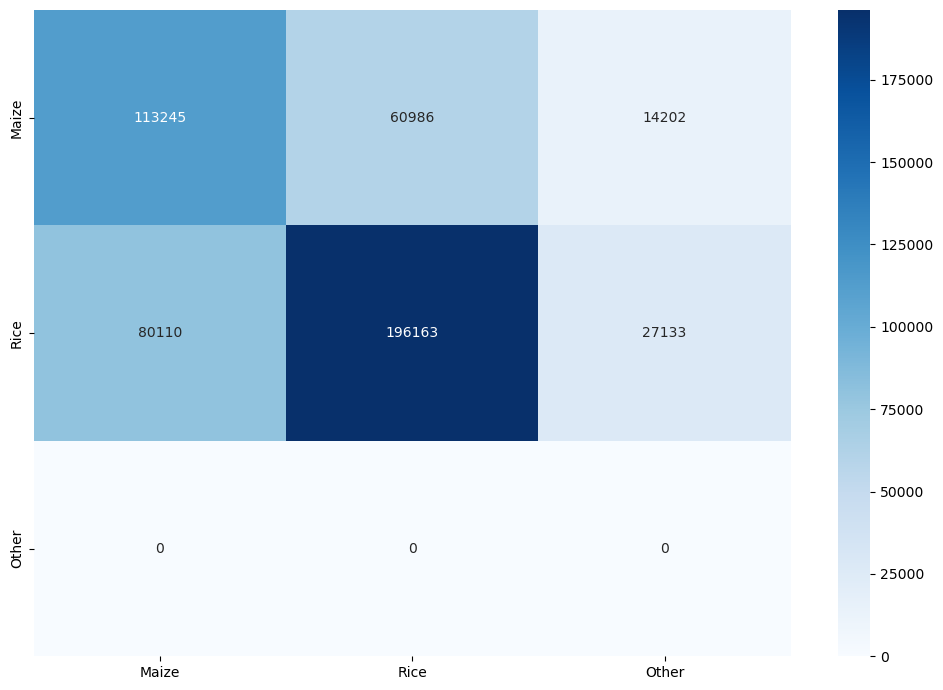

In [39]:
df_cm_knn_2023 = pd.DataFrame(confusion_knn_2023, index = all_classes, columns = all_classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_knn_2023, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("KNeighbors_2023_cm")

In [40]:
# measure accuracy
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=y_test_2023, y_pred=y_pred_knn_2023))
print('Recall: %.3f' % metrics.recall_score(y_true=y_test_2023, y_pred=y_pred_knn_2023, average='weighted'))
print('Precision: %.3f' % metrics.precision_score(y_true=y_test_2023, y_pred=y_pred_knn_2023, average='weighted'))
print('F1-Score: %.3f' % metrics.f1_score(y_true=y_test_2023, y_pred=y_pred_knn_2023, average='weighted'))

Accuracy: 0.629
Recall: 0.629
Precision: 0.695
F1-Score: 0.659


### DecisionTreeClassifier

In [17]:
# Load saved model
pickled_dt_model = pickle.load(open('models/CC/dt_cv.pkl', 'rb'))

In [18]:
print(datetime.datetime.now())
y_pred_dt_2023 = pickled_dt_model.predict(X_test_2023_scaled)
print(datetime.datetime.now())

2024-06-11 18:33:49.585465
2024-06-11 18:33:49.602028


In [19]:
# evaluation: Confusion Matrix
confusion_dt_2023 = metrics.confusion_matrix(y_true = y_test_2023, y_pred = y_pred_dt_2023)
confusion_dt_2023

array([[15302,  6040,  5662],
       [10968, 19657, 13207],
       [    0,     0,     0]], dtype=int64)

Saving figure Decision_tree_20230910_cm


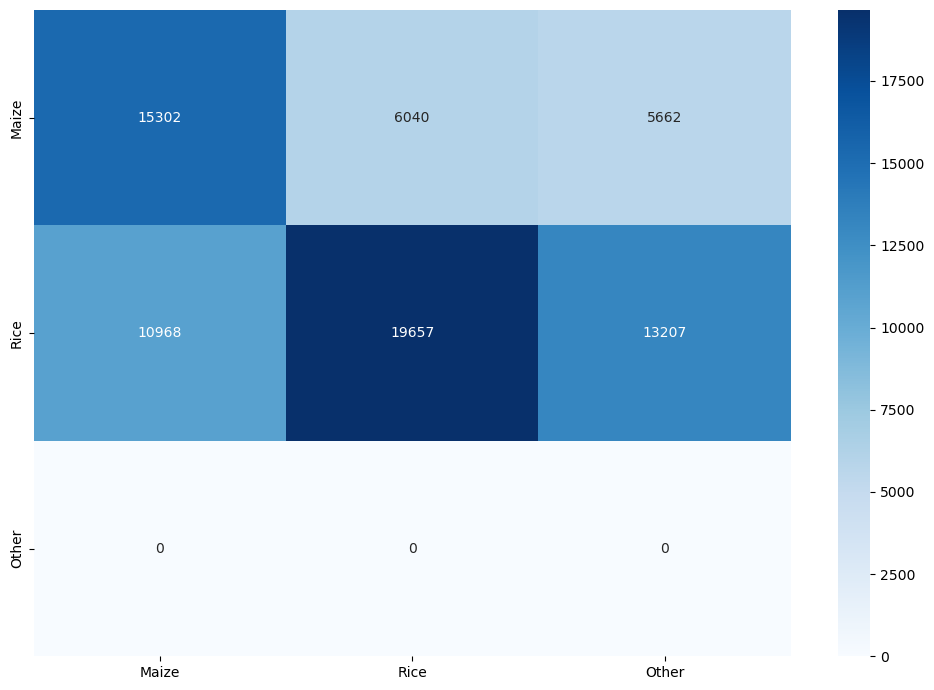

In [20]:
df_cm_dt_2023 = pd.DataFrame(confusion_dt_2023, index = all_classes, columns = all_classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_dt_2023, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("Decision_tree_20230910_cm")

In [21]:
# measure accuracy
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=y_test_2023, y_pred=y_pred_dt_2023))
print('Recall: %.3f' % metrics.recall_score(y_true=y_test_2023, y_pred=y_pred_dt_2023, average='weighted'))
print('Precision: %.3f' % metrics.precision_score(y_true=y_test_2023, y_pred=y_pred_dt_2023, average='weighted'))
print('F1-Score: %.3f' % metrics.f1_score(y_true=y_test_2023, y_pred=y_pred_dt_2023, average='weighted'))

Accuracy: 0.494
Recall: 0.494
Precision: 0.695
F1-Score: 0.569


### RandomForestClassifier

In [17]:
# Load saved model
pickled_rf_model = pickle.load(open('models/CC/rf_cv.pkl', 'rb'))

In [18]:
print(datetime.datetime.now())
y_pred_rf_2023 = pickled_rf_model.predict(X_test_2023_scaled)
print(datetime.datetime.now())

2024-06-03 21:19:53.317967
2024-06-03 21:20:44.976600


In [19]:
# evaluation: Confusion Matrix
confusion_rf_2023 = metrics.confusion_matrix(y_true = y_test_2023, y_pred = y_pred_rf_2023)
confusion_rf_2023

array([[100051,  21686,  66696],
       [ 52070, 153665,  97671],
       [     0,      0,      0]], dtype=int64)

Saving figure Random_forest_2023_cm


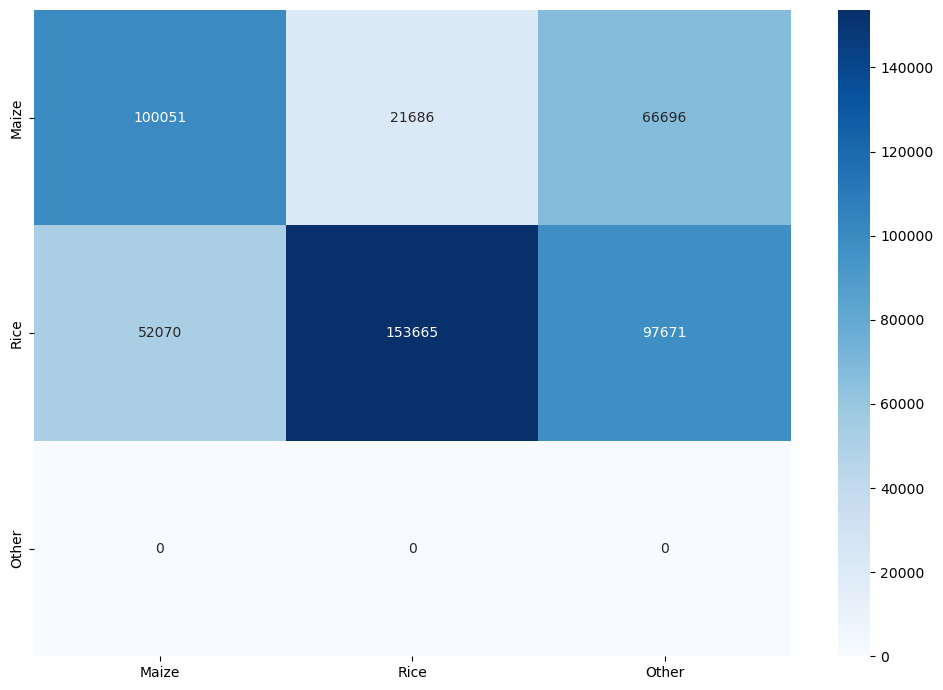

In [20]:
df_cm_rf_2023 = pd.DataFrame(confusion_rf_2023, index = all_classes, columns = all_classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_rf_2023, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("Random_forest_2023_cm")

In [21]:
# measure accuracy
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=y_test_2023, y_pred=y_pred_rf_2023))
print('Recall: %.3f' % metrics.recall_score(y_true=y_test_2023, y_pred=y_pred_rf_2023, average='weighted'))
print('Precision: %.3f' % metrics.precision_score(y_true=y_test_2023, y_pred=y_pred_rf_2023, average='weighted'))
print('F1-Score: %.3f' % metrics.f1_score(y_true=y_test_2023, y_pred=y_pred_rf_2023, average='weighted'))

Accuracy: 0.516
Recall: 0.516
Precision: 0.793
F1-Score: 0.621


### XGBoost (extreme Gradient Boosting) Classifier

In [22]:
# Load saved model 
pickled_xgb_model = pickle.load(open('models/CC/xgb_cv.pkl', 'rb'))

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ytest_2023 = le.fit_transform(y_test_2023)

In [24]:
# Load the scaler object
with open('models/CC/encoder.pkl', 'rb') as f:
    encoder = pickle.load(f)

ytest_2023 = encoder.transform(y_test_2023)

In [25]:
ytest_2023

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [26]:
print(datetime.datetime.now())
y_pred_xgb_2023 = pickled_xgb_model.predict(X_test_2023_scaled)
print(datetime.datetime.now())

2024-06-03 21:20:49.395714
2024-06-03 21:20:50.879892


In [27]:
# evaluation: Confusion Matrix
confusion_xgb_2023 = metrics.confusion_matrix(y_true = ytest_2023, y_pred = y_pred_xgb_2023)
confusion_xgb_2023

array([[ 90367,  21965,  76101],
       [ 32636, 159542, 111228],
       [     0,      0,      0]], dtype=int64)

Saving figure xgb_2023_cm


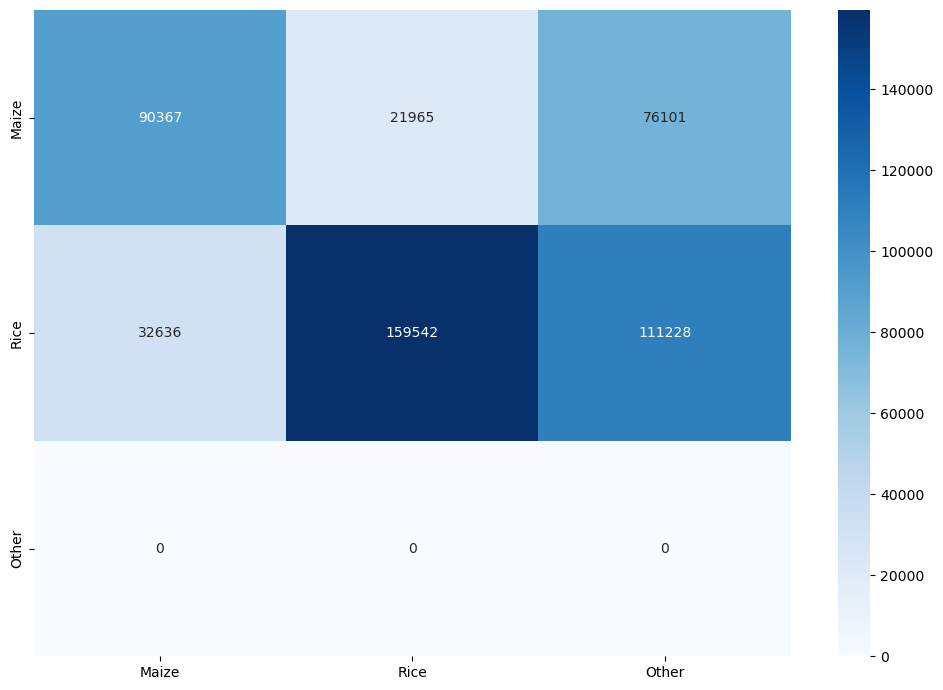

In [28]:
df_cm_xgb_2023 = pd.DataFrame(confusion_xgb_2023, index = all_classes, columns = all_classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_xgb_2023, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("xgb_2023_cm")

In [29]:
# measure accuracy
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=ytest_2023, y_pred=y_pred_xgb_2023))
print('Recall: %.3f' % metrics.recall_score(y_true=ytest_2023, y_pred=y_pred_xgb_2023, average='weighted'))
print('Precision: %.3f' % metrics.precision_score(y_true=ytest_2023, y_pred=y_pred_xgb_2023, average='weighted'))
print('F1-Score: %.3f' % metrics.f1_score(y_true=ytest_2023, y_pred=y_pred_xgb_2023, average='weighted'))

Accuracy: 0.508
Recall: 0.508
Precision: 0.824
F1-Score: 0.628


### SVM RBF

In [30]:
import os
os.add_dll_directory("C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.3\\bin")

<AddedDllDirectory('C:\\Program Files\\NVIDIA GPU Computing Toolkit\\CUDA\\v12.3\\bin')>

In [31]:
import thundersvm
from thundersvm import SVC

In [32]:
# Load saved model
pickled_svm_model = pickle.load(open('models/CC/svc_rbf_cv.pkl', 'rb'))

In [33]:
print(datetime.datetime.now())
y_pred_svc_2023 = pickled_svm_model.predict(X_test_2023_scaled)
print(datetime.datetime.now())

2024-06-03 21:22:18.197951
2024-06-03 21:38:21.537023


In [34]:
# evaluation: Confusion Matrix
confusion_svmr_2023 = metrics.confusion_matrix(y_true = y_test_2023, y_pred = y_pred_svc_2023)
confusion_svmr_2023

array([[  4521,   5914, 177998],
       [  2792,  18765, 281849],
       [     0,      0,      0]], dtype=int64)

Saving figure svm_rbf_2023_cm


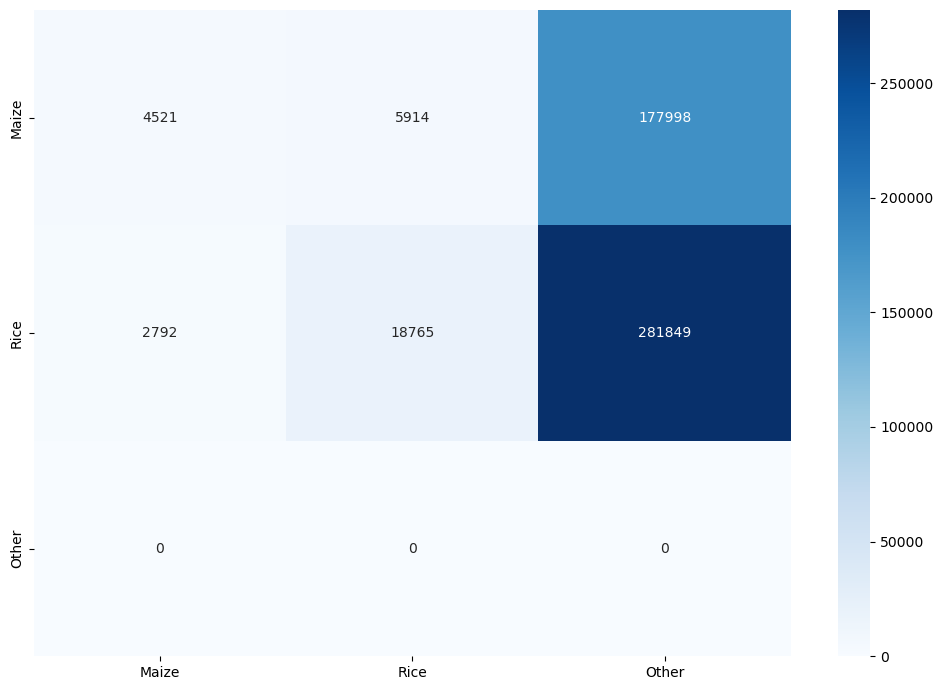

In [35]:
df_cm_svmr_2023 = pd.DataFrame(confusion_svmr_2023, index = all_classes, columns = all_classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_svmr_2023, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("svm_rbf_2023_cm")

In [36]:
# measure accuracy
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=y_test_2023, y_pred=y_pred_svc_2023))
print('Recall: %.3f' % metrics.recall_score(y_true=y_test_2023, y_pred=y_pred_svc_2023, average='weighted'))
print('Precision: %.3f' % metrics.precision_score(y_true=y_test_2023, y_pred=y_pred_svc_2023, average='weighted'))
print('F1-Score: %.3f' % metrics.f1_score(y_true=y_test_2023, y_pred=y_pred_svc_2023, average='weighted'))

Accuracy: 0.047
Recall: 0.047
Precision: 0.706
F1-Score: 0.088


### LSTM

In [37]:
def unpack(model, training_config, weights):
    restored_model = deserialize(model)
    if training_config is not None:
        restored_model.compile(
            **saving_utils.compile_args_from_training_config(
                training_config
            )
        )
    restored_model.set_weights(weights)
    return restored_model

# Hotfix function
def make_keras_picklable():

    def __reduce__(self):
        model_metadata = saving_utils.model_metadata(self)
        training_config = model_metadata.get("training_config", None)
        model = serialize(self)
        weights = self.get_weights()
        return (unpack, (model, training_config, weights))

    cls = Model
    cls.__reduce__ = __reduce__

# Run the function
make_keras_picklable()

In [38]:
# Load the saved model
pickled_lstm_model = pickle.load(open('models/CC/lstm_model.pkl', 'rb'))

In [39]:
# Reshape the X shape to fit in LSTM (add one dimension)
X_test_2023_scaled_reshaped = X_test_2023_scaled.reshape((X_test_2023_scaled.shape[0], X_test_2023_scaled.shape[1], 1))

In [40]:
# Change Y values to be from 0 to 2 instead of 1 to 3
y_test_mod_2023 = y_test_2023 - 1

In [41]:
print(X_test_2023_scaled_reshaped.shape)

(491839, 24, 1)


In [42]:
preds_2023 = np.argmax(pickled_lstm_model.predict(X_test_2023_scaled_reshaped), axis=-1)

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test_mod_2023, preds_2023))

              precision    recall  f1-score   support

         0.0       0.51      0.03      0.05    188433
         1.0       0.84      0.04      0.08    303406
         2.0       0.00      0.00      0.00         0

    accuracy                           0.04    491839
   macro avg       0.45      0.02      0.04    491839
weighted avg       0.71      0.04      0.07    491839



In [44]:
# evaluation: Confusion Matrix
confusion_lstm_2023 = metrics.confusion_matrix(y_true = y_test_mod_2023, y_pred = preds_2023)
confusion_lstm_2023

array([[  5038,   2339, 181056],
       [  4833,  12409, 286164],
       [     0,      0,      0]], dtype=int64)

Saving figure lstm_2023_cm


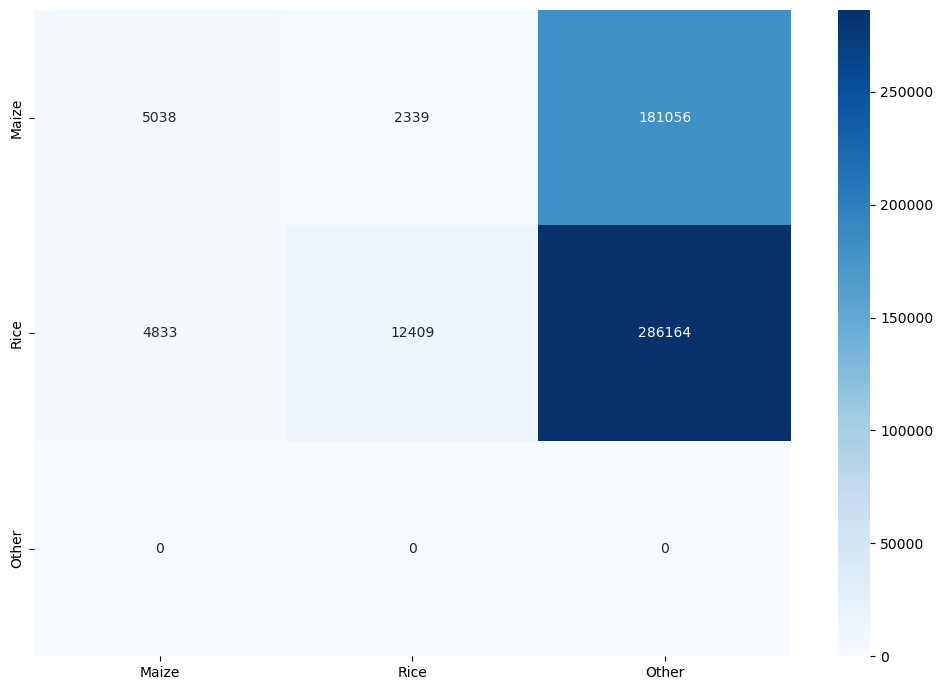

In [45]:
df_cm_lstm_2023 = pd.DataFrame(confusion_lstm_2023, index = all_classes, columns = all_classes)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm_lstm_2023, annot=True,fmt='d',cmap=plt.cm.Blues)
save_fig("lstm_2023_cm")

In [46]:
# measure accuracy
print('Accuracy: %.3f' % metrics.accuracy_score(y_true=y_test_mod_2023, y_pred=preds_2023))
print('Recall: %.3f' % metrics.recall_score(y_true=y_test_mod_2023, y_pred=preds_2023, average='weighted'))
print('Precision: %.3f' % metrics.precision_score(y_true=y_test_mod_2023, y_pred=preds_2023, average='weighted'))
print('F1-Score: %.3f' % metrics.f1_score(y_true=y_test_mod_2023, y_pred=preds_2023, average='weighted'))

Accuracy: 0.035
Recall: 0.035
Precision: 0.715
F1-Score: 0.068
